In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn imbalanced-learn

!pip install torch torchvision torchaudio torchsummary optuna shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 8.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, average_precision_score
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving creditcard.csv to creditcard.csv
User uploaded file "creditcard.csv" with length 150828752 bytes


After uploading, you can load the file into a pandas DataFrame like this:

In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['creditcard.csv'].decode('utf-8')))

# Display the first few rows of the DataFrame
display(df.head())


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Basic info
df.info()
# Summary stats
df.describe()
# Check missing values
df.isnull().sum().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

np.int64(0)

/tmp/ipython-input-479021057.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='coolwarm')


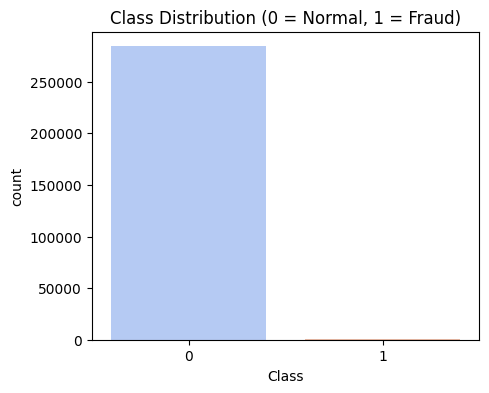

Fraudulent transactions: 0.1727%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=df, palette='coolwarm')
plt.title('Class Distribution (0 = Normal, 1 = Fraud)')
plt.show()

fraud_pct = df['Class'].mean() * 100
print(f"Fraudulent transactions: {fraud_pct:.4f}%")


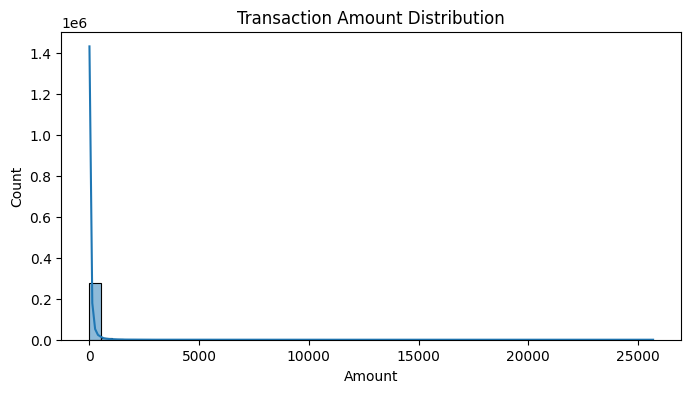

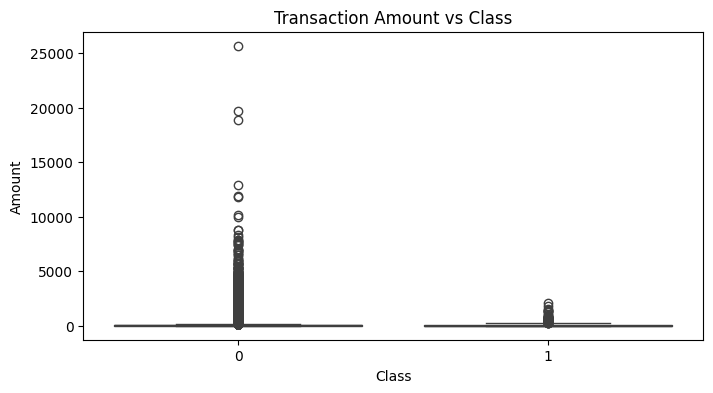

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amount vs Class")
plt.show()


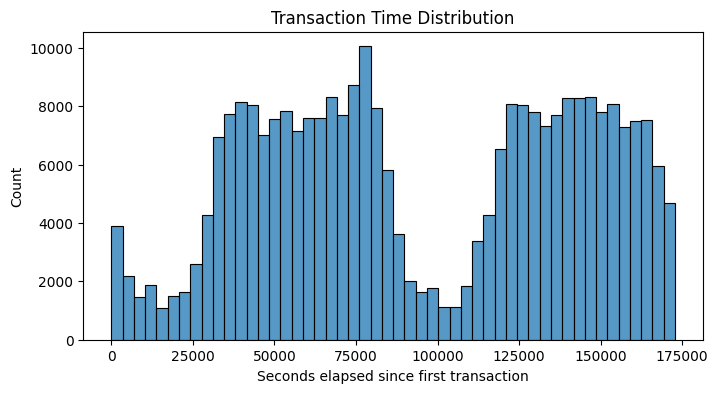

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['Time'], bins=50)
plt.title("Transaction Time Distribution")
plt.xlabel("Seconds elapsed since first transaction")
plt.show()


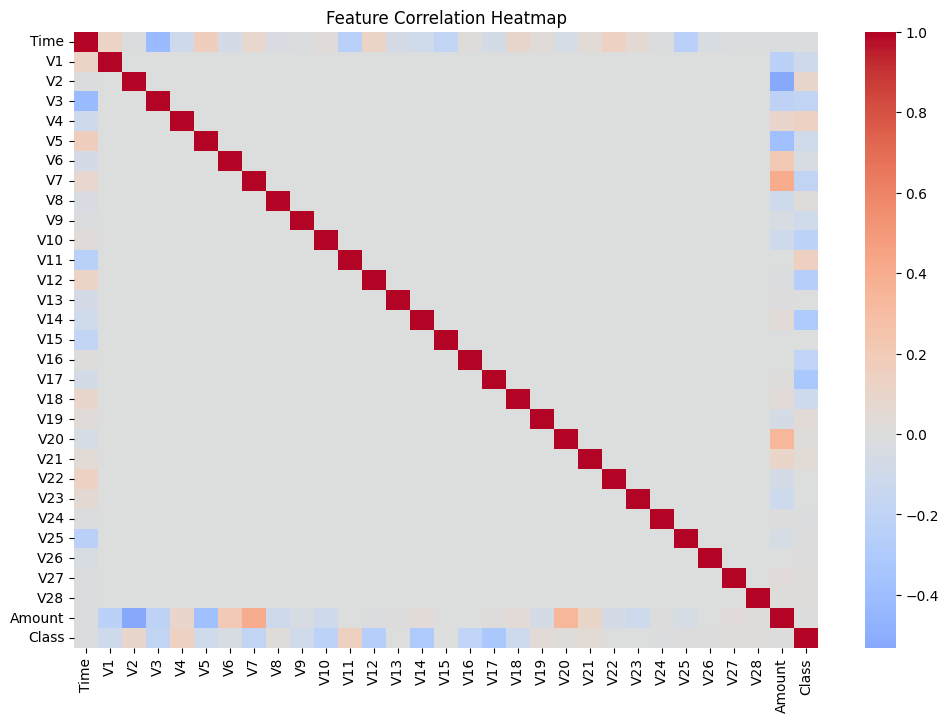

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


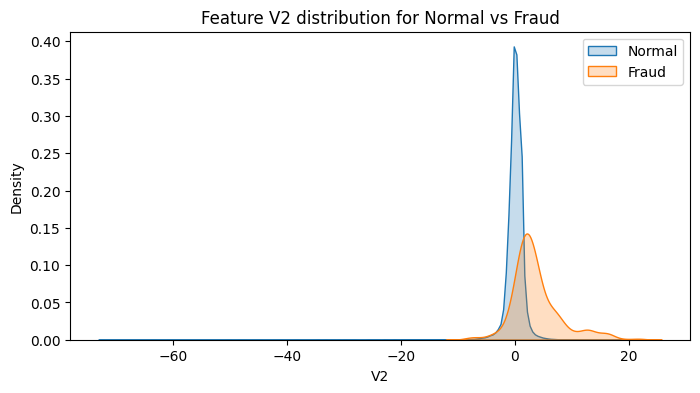

In [ ]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

plt.figure(figsize=(8,4))
sns.kdeplot(normal['V2'], label='Normal', fill=True)
sns.kdeplot(fraud['V2'], label='Fraud', fill=True)
plt.title("Feature V2 distribution for Normal vs Fraud")
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import RobustScaler

# Make copies to avoid touching the original df
df_prep = df.copy()

# Scale Amount and Time (RobustScaler handles outliers well)
scaler = RobustScaler()
df_prep['Amount_Scaled'] = scaler.fit_transform(df_prep[['Amount']])
df_prep['Time_Scaled'] = scaler.fit_transform(df_prep[['Time']])

# Drop original columns
df_prep.drop(['Amount', 'Time'], axis=1, inplace=True)

df_prep.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled,Time_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [ ]:
X = df_prep.drop('Class', axis=1)
y = df_prep['Class']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Fraud ratio in training set: {y_train.mean()*100:.4f}%")
print(f"Fraud ratio in test set: {y_test.mean()*100:.4f}%")


Train shape: (227845, 30), Test shape: (56962, 30)
Fraud ratio in training set: 0.1729%
Fraud ratio in test set: 0.1720%


In [ ]:
from collections import Counter
print("Before training imbalance:", Counter(y_train))


Before training imbalance: Counter({0: 227451, 1: 394})


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# Detect GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Convert dataframes to tensors
X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_test_t = torch.tensor(X_test.values, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Create DataLoaders
train_ds = TensorDataset(X_train_t, y_train_t)
test_ds = TensorDataset(X_test_t, y_test_t)

train_dl = DataLoader(train_ds, batch_size=1024, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=1024, shuffle=False)

Using device: cpu


In [ ]:
class FraudNet(nn.Module):
    def __init__(self, input_dim):
        super(FraudNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.drop1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.drop2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.drop3 = nn.Dropout(0.2)

        self.out = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.drop1(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.drop2(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.drop3(x)
        return self.out(x)  # REMOVE sigmoid here



In [ ]:
# Convert pos_weight to float32 for PyTorch
pos_weight = torch.tensor([y_train.value_counts()[0] / y_train.value_counts()[1]], dtype=torch.float32, device=device)
print("Class weight (pos_weight):", pos_weight)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

Class weight (pos_weight): tensor([577.2868])


In [ ]:
# Initialize the model
input_dim = X_train.shape[1]
model = FraudNet(input_dim).to(device)
print(model)

FraudNet(
  (fc1): Linear(in_features=30, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop3): Dropout(p=0.2, inplace=False)
  (out): Linear(in_features=64, out_features=1, bias=True)
)


In [ ]:
from tqdm import tqdm

epochs = 40
model.train()

for epoch in range(epochs):
    total_loss = 0
    for xb, yb in tqdm(train_dl, desc=f"Epoch {epoch+1}/{epochs}"):
        xb, yb = xb.to(device), yb.to(device)

        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_dl):.6f}")

Epoch 1/40: 100%|██████████| 223/223 [00:11<00:00, 19.95it/s]


Epoch [1/40], Loss: 0.529877


Epoch 2/40: 100%|██████████| 223/223 [00:08<00:00, 25.76it/s]


Epoch [2/40], Loss: 0.334256


Epoch 3/40: 100%|██████████| 223/223 [00:09<00:00, 23.38it/s]


Epoch [3/40], Loss: 0.260240


Epoch 4/40: 100%|██████████| 223/223 [00:09<00:00, 23.47it/s]


Epoch [4/40], Loss: 0.258052


Epoch 5/40: 100%|██████████| 223/223 [00:09<00:00, 23.82it/s]


Epoch [5/40], Loss: 0.256228


Epoch 6/40: 100%|██████████| 223/223 [00:09<00:00, 24.48it/s]


Epoch [6/40], Loss: 0.217445


Epoch 7/40: 100%|██████████| 223/223 [00:10<00:00, 22.17it/s]


Epoch [7/40], Loss: 0.200877


Epoch 8/40: 100%|██████████| 223/223 [00:09<00:00, 22.49it/s]


Epoch [8/40], Loss: 0.177381


Epoch 9/40: 100%|██████████| 223/223 [00:09<00:00, 23.92it/s]


Epoch [9/40], Loss: 0.178014


Epoch 10/40: 100%|██████████| 223/223 [00:09<00:00, 24.09it/s]


Epoch [10/40], Loss: 0.166616


Epoch 11/40: 100%|██████████| 223/223 [00:09<00:00, 23.14it/s]


Epoch [11/40], Loss: 0.169121


Epoch 12/40: 100%|██████████| 223/223 [00:09<00:00, 23.51it/s]


Epoch [12/40], Loss: 0.142678


Epoch 13/40: 100%|██████████| 223/223 [00:08<00:00, 25.49it/s]


Epoch [13/40], Loss: 0.132717


Epoch 14/40: 100%|██████████| 223/223 [00:09<00:00, 22.80it/s]


Epoch [14/40], Loss: 0.127655


Epoch 15/40: 100%|██████████| 223/223 [00:09<00:00, 22.96it/s]


Epoch [15/40], Loss: 0.127772


Epoch 16/40: 100%|██████████| 223/223 [00:09<00:00, 22.43it/s]


Epoch [16/40], Loss: 0.123577


Epoch 17/40: 100%|██████████| 223/223 [00:08<00:00, 26.18it/s]


Epoch [17/40], Loss: 0.121999


Epoch 18/40: 100%|██████████| 223/223 [00:09<00:00, 23.55it/s]


Epoch [18/40], Loss: 0.102561


Epoch 19/40: 100%|██████████| 223/223 [00:09<00:00, 22.97it/s]


Epoch [19/40], Loss: 0.100522


Epoch 20/40: 100%|██████████| 223/223 [00:08<00:00, 25.54it/s]


Epoch [20/40], Loss: 0.104165


Epoch 21/40: 100%|██████████| 223/223 [00:09<00:00, 23.34it/s]


Epoch [21/40], Loss: 0.120289


Epoch 22/40: 100%|██████████| 223/223 [00:09<00:00, 22.45it/s]


Epoch [22/40], Loss: 0.125133


Epoch 23/40: 100%|██████████| 223/223 [00:09<00:00, 23.64it/s]


Epoch [23/40], Loss: 0.104351


Epoch 24/40: 100%|██████████| 223/223 [00:08<00:00, 26.15it/s]


Epoch [24/40], Loss: 0.106746


Epoch 25/40: 100%|██████████| 223/223 [00:09<00:00, 22.92it/s]


Epoch [25/40], Loss: 0.081019


Epoch 26/40: 100%|██████████| 223/223 [00:12<00:00, 17.22it/s]


Epoch [26/40], Loss: 0.073453


Epoch 27/40: 100%|██████████| 223/223 [00:09<00:00, 22.66it/s]


Epoch [27/40], Loss: 0.087694


Epoch 28/40: 100%|██████████| 223/223 [00:09<00:00, 24.05it/s]


Epoch [28/40], Loss: 0.120857


Epoch 29/40: 100%|██████████| 223/223 [00:08<00:00, 24.90it/s]


Epoch [29/40], Loss: 0.100628


Epoch 30/40: 100%|██████████| 223/223 [00:09<00:00, 22.70it/s]


Epoch [30/40], Loss: 0.078279


Epoch 31/40: 100%|██████████| 223/223 [00:09<00:00, 23.75it/s]


Epoch [31/40], Loss: 0.095821


Epoch 32/40: 100%|██████████| 223/223 [00:09<00:00, 24.49it/s]


Epoch [32/40], Loss: 0.079631


Epoch 33/40: 100%|██████████| 223/223 [00:09<00:00, 23.54it/s]


Epoch [33/40], Loss: 0.087387


Epoch 34/40: 100%|██████████| 223/223 [00:09<00:00, 22.97it/s]


Epoch [34/40], Loss: 0.103970


Epoch 35/40: 100%|██████████| 223/223 [00:09<00:00, 23.68it/s]


Epoch [35/40], Loss: 0.101787


Epoch 36/40: 100%|██████████| 223/223 [00:08<00:00, 26.23it/s]


Epoch [36/40], Loss: 0.086096


Epoch 37/40: 100%|██████████| 223/223 [00:09<00:00, 22.83it/s]


Epoch [37/40], Loss: 0.108320


Epoch 38/40: 100%|██████████| 223/223 [00:10<00:00, 22.26it/s]


Epoch [38/40], Loss: 0.069847


Epoch 39/40: 100%|██████████| 223/223 [00:09<00:00, 23.83it/s]


Epoch [39/40], Loss: 0.077959


Epoch 40/40: 100%|██████████| 223/223 [00:09<00:00, 24.10it/s]

Epoch [40/40], Loss: 0.081172


ROC-AUC: 0.9753
Precision: 0.0970
Recall: 0.8980
F1-score: 0.1751


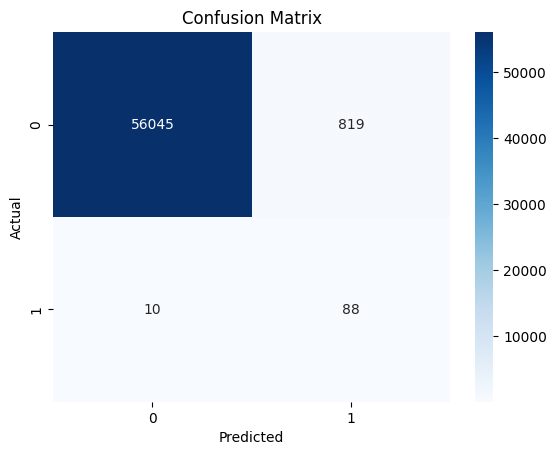

In [ ]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_t.to(device)).cpu().numpy()

from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, confusion_matrix

roc = roc_auc_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, (y_pred>0.5).astype(int), average='binary')

print(f"ROC-AUC: {roc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, (y_pred>0.5).astype(int))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only features
features = df_prep.drop('Class', axis=1)

scaler_ae = StandardScaler()
X_scaled = scaler_ae.fit_transform(features)

# Split normal and fraud transactions
X_normal = X_scaled[df_prep['Class'] == 0]  # Train only on normal
X_fraud = X_scaled[df_prep['Class'] == 1]   # For evaluation later

# Convert to PyTorch tensor
X_normal_t = torch.tensor(X_normal, dtype=torch.float32)
X_fraud_t = torch.tensor(X_fraud, dtype=torch.float32)

from torch.utils.data import DataLoader, TensorDataset
train_ds_ae = TensorDataset(X_normal_t)
train_dl_ae = DataLoader(train_ds_ae, batch_size=1024, shuffle=True)


In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 4)  # Bottleneck
        )
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim)  # Reconstruct original input
        )

    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out

# Initialize
input_dim = X_scaled.shape[1]
autoencoder = Autoencoder(input_dim).to(device)
criterion_ae = nn.MSELoss()
optimizer_ae = torch.optim.Adam(autoencoder.parameters(), lr=1e-3)


In [ ]:
epochs_ae = 30

for epoch in range(epochs_ae):
    autoencoder.train()
    total_loss = 0
    for batch in train_dl_ae:
        xb = batch[0].to(device)
        optimizer_ae.zero_grad()
        output = autoencoder(xb)
        loss = criterion_ae(output, xb)
        loss.backward()
        optimizer_ae.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs_ae}, Loss: {total_loss/len(train_dl_ae):.6f}")


Epoch 1/30, Loss: 0.886416
Epoch 2/30, Loss: 0.731793
Epoch 3/30, Loss: 0.665167
Epoch 4/30, Loss: 0.641276
Epoch 5/30, Loss: 0.627545
Epoch 6/30, Loss: 0.616530
Epoch 7/30, Loss: 0.606656
Epoch 8/30, Loss: 0.597698
Epoch 9/30, Loss: 0.590202
Epoch 10/30, Loss: 0.584884
Epoch 11/30, Loss: 0.579714
Epoch 12/30, Loss: 0.574649
Epoch 13/30, Loss: 0.569139
Epoch 14/30, Loss: 0.563375
Epoch 15/30, Loss: 0.559624
Epoch 16/30, Loss: 0.556872
Epoch 17/30, Loss: 0.554476
Epoch 18/30, Loss: 0.552668
Epoch 19/30, Loss: 0.550664
Epoch 20/30, Loss: 0.548935
Epoch 21/30, Loss: 0.547488
Epoch 22/30, Loss: 0.546592
Epoch 23/30, Loss: 0.545427
Epoch 24/30, Loss: 0.544416
Epoch 25/30, Loss: 0.543841
Epoch 26/30, Loss: 0.542636
Epoch 27/30, Loss: 0.542204
Epoch 28/30, Loss: 0.541550
Epoch 29/30, Loss: 0.540825
Epoch 30/30, Loss: 0.540129


In [ ]:
autoencoder.eval()
with torch.no_grad():
    X_normal_pred = autoencoder(X_normal_t.to(device)).cpu()
    X_fraud_pred = autoencoder(X_fraud_t.to(device)).cpu()

# MSE per transaction
mse_normal = ((X_normal_t - X_normal_pred) ** 2).mean(dim=1).numpy()
mse_fraud = ((X_fraud_t - X_fraud_pred) ** 2).mean(dim=1).numpy()


In [ ]:
#set threshold

import numpy as np

threshold = mse_normal.mean() + 3 * mse_normal.std()
print("Reconstruction error threshold:", threshold)

# Predict fraud
y_pred_ae_normal = (mse_normal > threshold).astype(int)
y_pred_ae_fraud = (mse_fraud > threshold).astype(int)

# Combine for evaluation
y_true_ae = np.concatenate([np.zeros(len(mse_normal)), np.ones(len(mse_fraud))])
y_pred_ae = np.concatenate([y_pred_ae_normal, y_pred_ae_fraud])


Reconstruction error threshold: 4.2375107


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    284315
         1.0       0.20      0.67      0.31       492

    accuracy                           0.99    284807
   macro avg       0.60      0.84      0.65    284807
weighted avg       1.00      0.99      1.00    284807

ROC-AUC: 0.9241154427793861


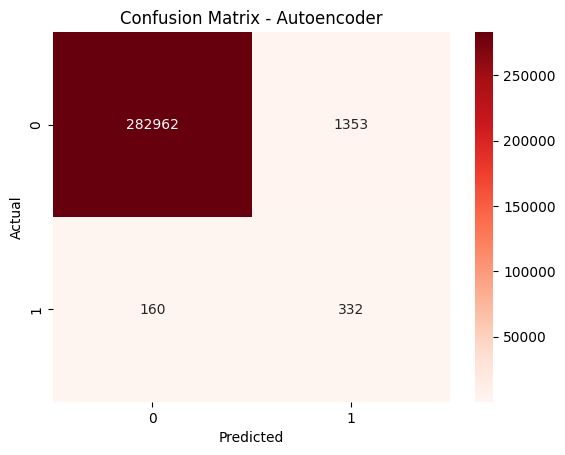

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_true_ae, y_pred_ae))
print("ROC-AUC:", roc_auc_score(y_true_ae, np.concatenate([mse_normal, mse_fraud])))

import seaborn as sns
import matplotlib.pyplot as plt

cm_ae = confusion_matrix(y_true_ae, y_pred_ae)
sns.heatmap(cm_ae, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Autoencoder")
plt.show()


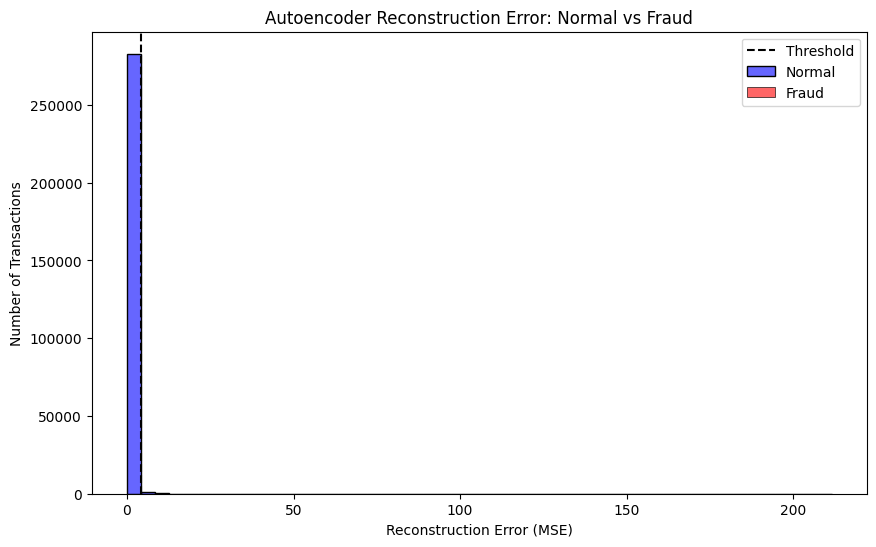

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# mse_normal and mse_fraud are from Autoencoder
plt.figure(figsize=(10,6))
sns.histplot(mse_normal, bins=50, color='blue', label='Normal', alpha=0.6)
sns.histplot(mse_fraud, bins=50, color='red', label='Fraud', alpha=0.6)
plt.axvline(threshold, color='black', linestyle='--', label='Threshold')
plt.title("Autoencoder Reconstruction Error: Normal vs Fraud")
plt.xlabel("Reconstruction Error (MSE)")
plt.ylabel("Number of Transactions")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# DNN predictions
y_pred_dnn_labels = (y_pred > 0.5).astype(int)  # y_pred from DNN
roc_auc_dnn = roc_auc_score(y_test, y_pred)

# Autoencoder predictions
roc_auc_ae = roc_auc_score(y_true_ae, np.concatenate([mse_normal, mse_fraud]))

summary = {
    "Model": ["DNN (Supervised)", "Autoencoder (Unsupervised)"],
    "Precision": [
        precision_score(y_test, y_pred_dnn_labels),
        precision_score(y_true_ae, y_pred_ae)
    ],
    "Recall": [
        recall_score(y_test, y_pred_dnn_labels),
        recall_score(y_true_ae, y_pred_ae)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_dnn_labels),
        f1_score(y_true_ae, y_pred_ae)
    ],
    "ROC-AUC": [roc_auc_dnn, roc_auc_ae]
}

import pandas as pd
df_summary = pd.DataFrame(summary)
df_summary


,Model,Precision,Recall,F1-Score,ROC-AUC
0,DNN (Supervised),0.097023,0.897959,0.175124,0.975326
1,Autoencoder (Unsupervised),0.197033,0.674797,0.305007,0.924115


In [ ]:
!pip install shap

import shap
import matplotlib.pyplot as plt

In [ ]:
# Convert DNN to probability function
def model_predict(X):
    model.eval()
    with torch.no_grad():
        X_t = torch.tensor(X, dtype=torch.float32).to(device)
        y_logits = model(X_t)
        y_prob = torch.sigmoid(y_logits).cpu().numpy()
    return y_prob

In [ ]:
# Initialize the model
input_dim = X_train.shape[1]
model = FraudNet(input_dim).to(device)
print(model)

FraudNet(
  (fc1): Linear(in_features=30, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop3): Dropout(p=0.2, inplace=False)
  (out): Linear(in_features=64, out_features=1, bias=True)
)


In [ ]:
class FraudNet(nn.Module):
    def __init__(self, input_dim):
        super(FraudNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.drop1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.drop2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.drop3 = nn.Dropout(0.2)

        self.out = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.drop1(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.drop2(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.drop3(x)
        return self.out(x)  # REMOVE sigmoid here

In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['creditcard.csv'].decode('utf-8')))

# Display the first few rows of the DataFrame
display(df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Fraud ratio in training set: {y_train.mean()*100:.4f}%")
print(f"Fraud ratio in test set: {y_test.mean()*100:.4f}%")

Train shape: (227845, 30), Test shape: (56962, 30)
Fraud ratio in training set: 0.1729%
Fraud ratio in test set: 0.1720%


In [ ]:
from sklearn.preprocessing import RobustScaler

# Make copies to avoid touching the original df
df_prep = df.copy()

# Scale Amount and Time (RobustScaler handles outliers well)
scaler = RobustScaler()
df_prep['Amount_Scaled'] = scaler.fit_transform(df_prep[['Amount']])
df_prep['Time_Scaled'] = scaler.fit_transform(df_prep[['Time']])

# Drop original columns
df_prep.drop(['Amount', 'Time'], axis=1, inplace=True)

X = df_prep.drop('Class', axis=1)
y = df_prep['Class']

In [ ]:
from sklearn.preprocessing import RobustScaler

# Make copies to avoid touching the original df
df_prep = df.copy()

# Scale Amount and Time (RobustScaler handles outliers well)
scaler = RobustScaler()
df_prep['Amount_Scaled'] = scaler.fit_transform(df_prep[['Amount']])
df_prep['Time_Scaled'] = scaler.fit_transform(df_prep[['Time']])

# Drop original columns
df_prep.drop(['Amount', 'Time'], axis=1, inplace=True)

X = df_prep.drop('Class', axis=1)
y = df_prep['Class']

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving creditcard.csv to creditcard (1).csv
User uploaded file "creditcard (1).csv" with length 150828752 bytes


In [ ]:
from sklearn.preprocessing import RobustScaler

# Make copies to avoid touching the original df
df_prep = df.copy()

# Scale Amount and Time (RobustScaler handles outliers well)
scaler = RobustScaler()
df_prep['Amount_Scaled'] = scaler.fit_transform(df_prep[['Amount']])
df_prep['Time_Scaled'] = scaler.fit_transform(df_prep[['Time']])

# Drop original columns
df_prep.drop(['Amount', 'Time'], axis=1, inplace=True)

X = df_prep.drop('Class', axis=1)
y = df_prep['Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Fraud ratio in training set: {y_train.mean()*100:.4f}%")
print(f"Fraud ratio in test set: {y_test.mean()*100:.4f}%")

Train shape: (227845, 30), Test shape: (56962, 30)
Fraud ratio in training set: 0.1729%
Fraud ratio in test set: 0.1720%


In [ ]:
# Save DNN
torch.save(model.state_dict(), "/content/dnn_model.pth")
# Save Autoencoder
torch.save(autoencoder.state_dict(), "/content/autoencoder_model.pth")

# Move to drive folder for packaging (optional)
!mkdir -p /content/project_package/saved_models
!cp /content/dnn_model.pth /content/project_package/saved_models/
!cp /content/autoencoder_model.pth /content/project_package/saved_models/


In [ ]:
# Save both trained models to files
torch.save(model.state_dict(), "/content/dnn_model.pth")
torch.save(autoencoder.state_dict(), "/content/autoencoder_model.pth")

print("Both models saved successfully!")


Both models saved successfully!
